# Aviation Accidents Analysis

You are part of a consulting firm that is tasked to do an analysis of commercial and passenger jet airline safety. The client (an airline/airplane insurer) is interested in knowing what types of aircraft (makes/models) exhibit low rates of total destruction and low likelihood of fatal or serious passenger injuries in the event of an accident. They are also interested in any general variables/conditions that might be at play. Your analysis will be based off of aviation accident data accumulated from the years 1948-2023. 

Our client is only interested in airplane makes/models that are professional builds and could potentially still be active. Assume a max lifetime of 40 years for a make/model retirement and make sure to filter your data accordingly (i.e. from 1983 onwards). They would also like separate recommendations for small aircraft vs. larger passenger models. **In addition, make sure that claims that you make are statistically robust and that you have enough samples when making comparisons between groups.**


In this summative assessment you will demonstrate your ability to:
- Use Pandas to load, inspect, and clean the dataset appropriately. 
- Transform relevant columns to create measures that address the problem at hand.
- **conduct EDA: visualization and statistical measures to understand the structure of the data**
- **recommend a set of manufacturers to consider as well as specific airplanes conforming to the client's request**
- **discuss the relationship between serious injuries/airplane damage incurred and at least *two* factors at play in the incident. You must provide supporting evidence (visuals, summary statistics, tables) for each claim you make.**

In [131]:
# loading relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis  
- Load in the cleaned data

In [132]:
df = pd.read_csv('data/CleanedAviationData.csv')
df.head()

,Event.Date,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Total Passangers,Fatal/Serious Injury Chance,Destroyed?,Type
0,1983-01-02,Destroyed,Airplane,Cessna,340A,No,2.0,Reciprocating,Personal,0.0,0.0,4.0,0.0,VMC,Takeoff,4.0,0.0,True,Cessna 340A
1,1983-01-02,Destroyed,Airplane,North American,T-6G,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,VMC,Maneuvering,2.0,1.0,True,North American T-6G
2,1983-01-02,Destroyed,Airplane,Piper,PA-24-250,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,Cruise,3.0,1.0,True,Piper PA-24-250
3,1983-01-02,Substantial,Airplane,Piper,PA-32-301R,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Maneuvering,2.0,0.0,False,Piper PA-32-301R
4,1983-01-02,Substantial,Airplane,Beech,V-35B,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,3.0,VMC,Takeoff,3.0,0.0,False,Beech V-35B


## Explore safety metrics across models/makes
- Remember that the client is interested in separate recommendations for smaller airplanes and larger airplanes. Choose a passenger threshold of 20 and separate the plane types. 

In [133]:
df.loc[df['Total Passangers'] < 20, 'Size'] = 'Small'
df['Size'] = df['Size'].fillna('Large')

In [135]:
df.head()

,Event.Date,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Total Passangers,Fatal/Serious Injury Chance,Destroyed?,Type,Size
0,1983-01-02,Destroyed,Airplane,Cessna,340A,No,2.0,Reciprocating,Personal,0.0,0.0,4.0,0.0,VMC,Takeoff,4.0,0.0,True,Cessna 340A,Small
1,1983-01-02,Destroyed,Airplane,North American,T-6G,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,VMC,Maneuvering,2.0,1.0,True,North American T-6G,Small
2,1983-01-02,Destroyed,Airplane,Piper,PA-24-250,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,Cruise,3.0,1.0,True,Piper PA-24-250,Small
3,1983-01-02,Substantial,Airplane,Piper,PA-32-301R,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Maneuvering,2.0,0.0,False,Piper PA-32-301R,Small
4,1983-01-02,Substantial,Airplane,Beech,V-35B,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,3.0,VMC,Takeoff,3.0,0.0,False,Beech V-35B,Small


#### Analyzing Makes

Explore the human injury risk profile for small and larger Makes:
- choose the 15 makes for each group possessing the lowest mean fatal/seriously injured fraction
- plot the mean fatal/seriously injured fraction for each of these subgroups side-by-side

In [163]:
small_plane = df[df['Size'] == 'Small']
large_plane = df[df['Size'] == 'Large']

#After dividing the dataframes, we run the risk again of working insufficient sample sizes. 

#Put the 50 makes threshold on the small plane dataframe. The large dataframe is much smaller. Threshold set to 10.

small_counts = small_plane['Make'].value_counts()

small_plane = small_plane[small_plane['Make'].isin(small_counts[small_counts >= 50].index)]

large_counts = large_plane['Make'].value_counts()

large_plane = large_plane[large_plane['Make'].isin(large_counts[large_counts >= 10].index)]

large_plane['Make'].value_counts()

Make
Boeing               729
Mcdonnell Douglas    208
Airbus               123
Embraer               63
Douglas               57
De Havilland          31
Lockheed              26
Beech                 17
British Aerospace     17
Aerospatiale          16
Canadair              14
Fairchild             13
Name: count, dtype: int64

In [164]:
#Grouping by make, we can pull the lowest mean fatal/serious injury fraction for each category.
small_plane_chance = small_plane.groupby('Make')['Fatal/Serious Injury Chance'].mean()
large_plane_chance = large_plane.groupby('Make')['Fatal/Serious Injury Chance'].mean()

In [165]:
small_15 = small_plane_chance.sort_values().head(15).reset_index()
small_15.columns = ['Make', 'Fatal/Serious Injury Chance']
small_15['Type'] = 'Small'

large_15 = large_plane_chance.sort_values().head(15).reset_index()
large_15.columns = ['Make', 'Fatal/Serious Injury Chance']
large_15['Type'] = 'Large'

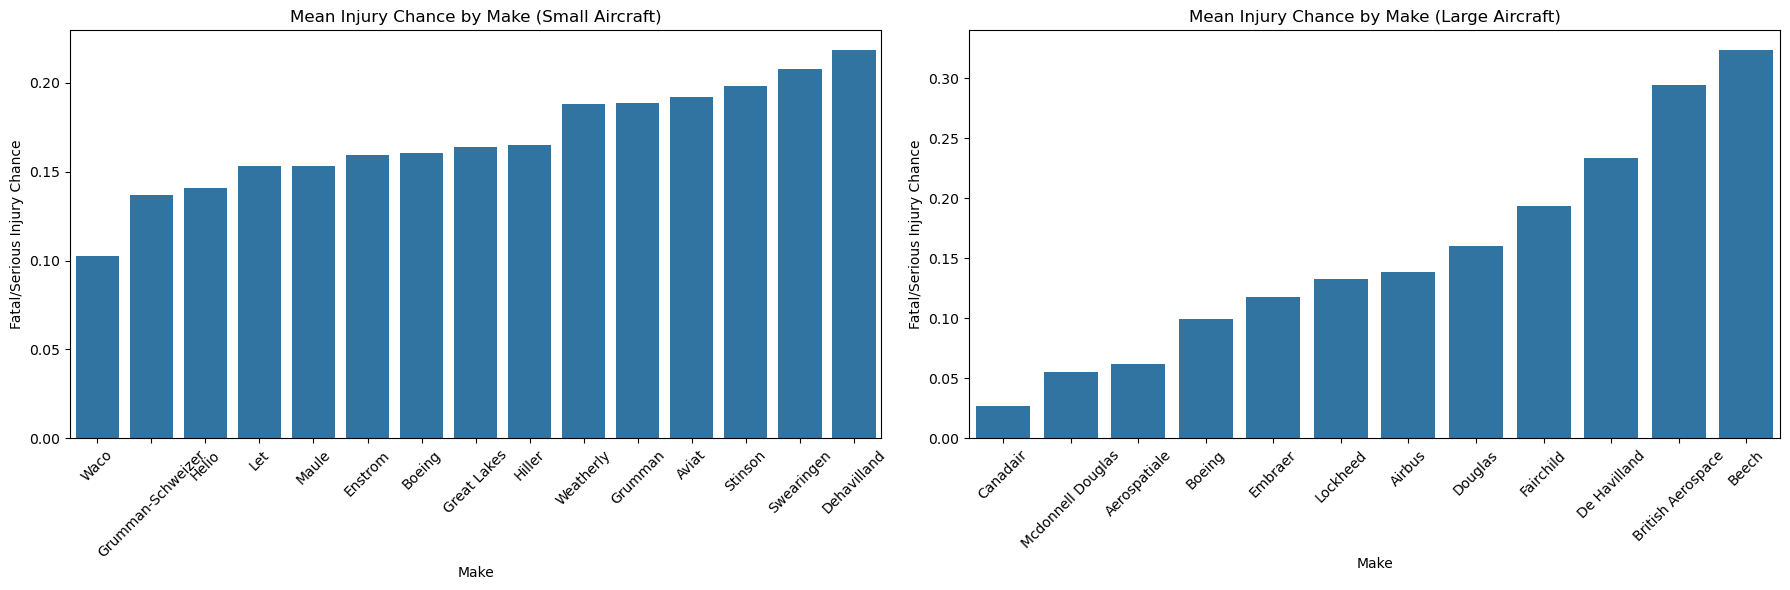

In [166]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(data=small_15, x='Make', y='Fatal/Serious Injury Chance', ax=axes[0])
axes[0].set_title('Mean Injury Chance by Make (Small Aircraft)')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(data=large_15, x='Make', y='Fatal/Serious Injury Chance', ax=axes[1])
axes[1].set_title('Mean Injury Chance by Make (Large Aircraft)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Distribution of injury rates: small makes**

Use a violinplot to look at the distribution of the fraction of passengers serious/fatally injured for small airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

In [186]:
small_10 = small_plane_chance.sort_values().head(10).reset_index()

list(small_10['Make'])

filtered_small = small_plane[small_plane['Make'].isin(list(small_10['Make']))]

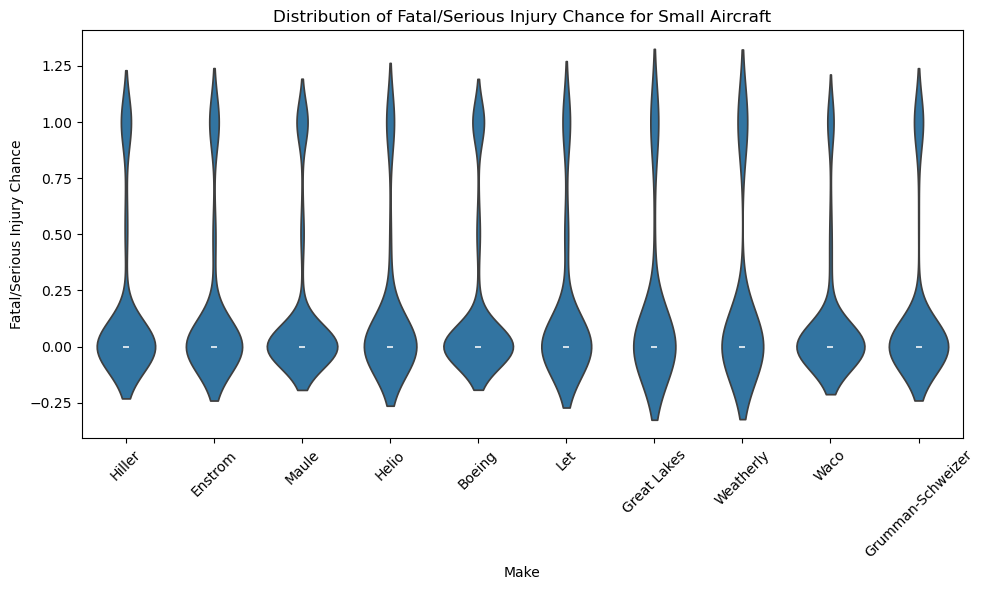

In [194]:
# Create a violin plot for the 10 lowest Fatal/Serious Injury Chance values
plt.figure(figsize=(10, 6))
sns.violinplot(data=filtered_small, x='Make', y='Fatal/Serious Injury Chance')

# Customize the plot (optional)
plt.title('Distribution of Fatal/Serious Injury Chance for Small Aircraft')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Show the plot
plt.show()

**Distribution of injury rates: large makes**

Use a stripplot to look at the distribution of the fraction of passengers serious/fatally injured for large airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

In [191]:
large_10 = large_plane_chance.sort_values().head(10).reset_index()

list(large_10['Make'])

filtered_large = large_plane[large_plane['Make'].isin(list(large_10['Make']))]

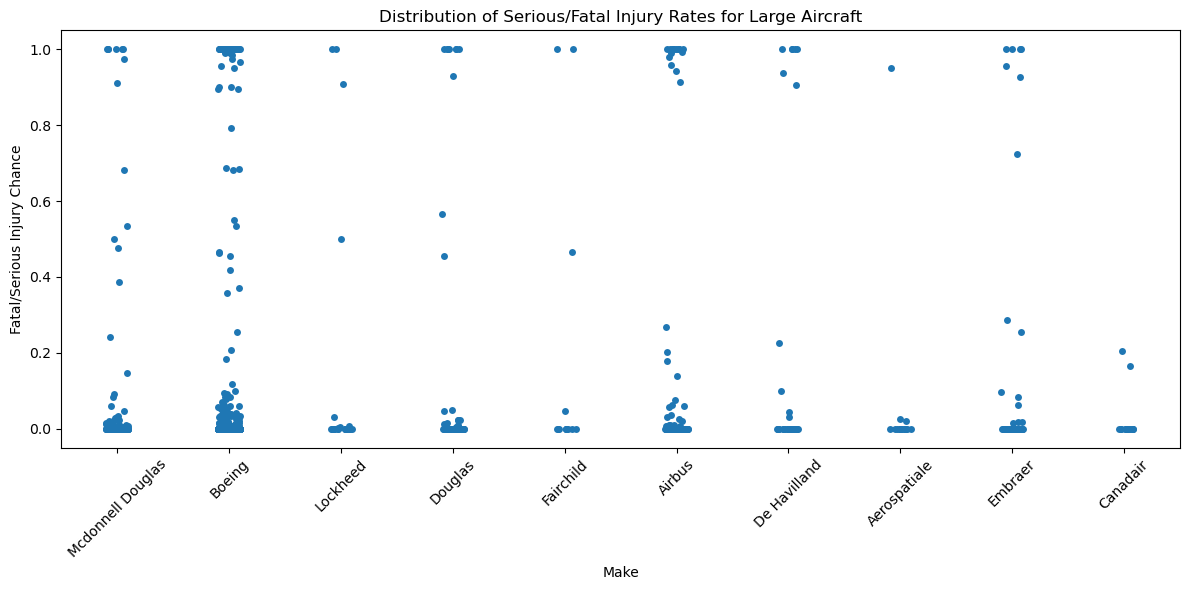

In [193]:
plt.figure(figsize=(12, 6))
sns.stripplot(data=filtered_large, x='Make', y='Fatal/Serious Injury Chance')

plt.title('Distribution of Serious/Fatal Injury Rates for Large Aircraft')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Evaluate the rate of aircraft destruction for both small and large aircraft by Make.** 

Sort your results and keep the lowest 15.

In [216]:
small_plane_dest = small_plane.groupby('Make')['Destroyed?'].sum()/small_plane.groupby('Make')['Destroyed?'].count()
large_plane_dest = large_plane.groupby('Make')['Destroyed?'].sum()/large_plane.groupby('Make')['Destroyed?'].count()

sort_small_dest = small_plane_dest.sort_values().head(15).reset_index()
sort_large_dest = large_plane_dest.sort_values().head(15).reset_index()

sort_small_dest.columns = ['Make', 'Chance of Destruction']
sort_small_dest['Type'] = 'Small'

sort_large_dest.columns = ['Make', 'Chance of Destruction']
sort_large_dest['Type'] = 'Large'

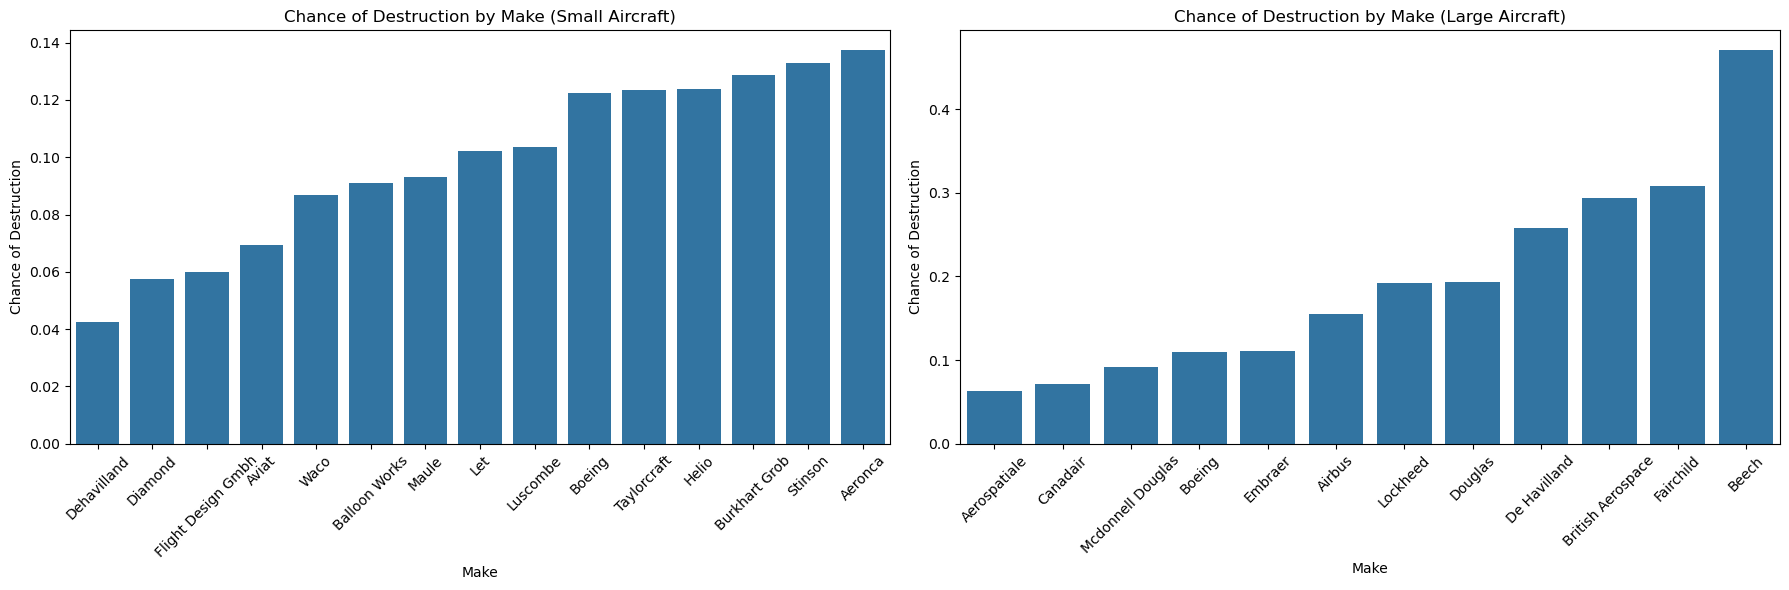

In [217]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(data=sort_small_dest, x='Make', y='Chance of Destruction', ax=axes[0])
axes[0].set_title('Chance of Destruction by Make (Small Aircraft)')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(data=sort_large_dest, x='Make', y='Chance of Destruction', ax=axes[1])
axes[1].set_title('Chance of Destruction by Make (Large Aircraft)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### Provide a short discussion on your findings for your summary statistics and plots:
- Make any recommendations for Makes here based off of the destroyed fraction and fraction fatally/seriously injured
- Comment on the calculated statistics and any corresponding distributions you have visualized.

In [232]:
common_small = set(small_15['Make']) & set(sort_small_dest['Make'])
print(f'Small planes: {common_small}.')

common_large = set(large_15['Make']) & set(sort_large_dest['Make'])
print(f'Large planes: {common_large}.')

Small planes: {'Maule', 'Aviat', 'Dehavilland', 'Boeing', 'Waco', 'Let', 'Stinson', 'Helio'}.
Large planes: {'De Havilland', 'Beech', 'Airbus', 'Fairchild', 'British Aerospace', 'Boeing', 'Mcdonnell Douglas', 'Douglas', 'Aerospatiale', 'Canadair', 'Lockheed', 'Embraer'}.


In [ ]:
'''Recommendations can be provided based on makes that have both the lowest rates of destruction and lowest serious injury/fatal risk. The makes
listed above are the safest aircraft designers based on these parameters. 


'''

### Analyze plane types
- plot the mean fatal/seriously injured fraction for both small and larger planes 
- also provide a distributional plot of your choice for the fatal/seriously injured fraction by airplane type (stripplot, violin, etc)  
- filter ensuring that you have at least ten individual examples in each model/make to average over

**Larger planes**

**Smaller planes**
- for smaller planes, limit your plotted results to the makes with the 10 lowest mean serious/fatal injury fractions

### Discussion of Specific Airplane Types
- Discuss what you have found above regarding passenger fraction seriously/ both small and large airplane models.

### Exploring Other Variables
- Investigate how other variables effect aircraft damage and injury. You must choose **two** factors out of the following but are free to analyze more:

- Weather Condition
- Engine Type
- Number of Engines
- Phase of Flight
- Purpose of Flight

For each factor provide a discussion explaining your analysis with appropriate visualization / data summaries and interpreting your findings.